<a href="https://colab.research.google.com/github/LokeshJatangi/EVA-vision/blob/master/Project%2010/Assignment%2010/Assignment_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install keract


In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(1996)
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
import numpy as np
import cv2

1.  Loading helper functions
2.  Load VGG
3. Load Image
4. Rescale image to 224x224x3 (VGG's expectation, why?)
5. Use expand_dims to convert image to a batch of size 1
6. Preprocesing normalizes our input image by subtracting mean RGB values

In [5]:
model = VGG16(weights="imagenet")
from skimage import io
dog = io.imread("https://www.rspcapetinsurance.org.au/rspca/media/images/hero/dog-insurance-hero.jpg")
dog = cv2.resize(dog, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
x = image.img_to_array(dog)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

W0812 16:42:42.772866 140673249175424 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0812 16:42:42.843050 140673249175424 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0812 16:42:42.851474 140673249175424 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0812 16:42:42.901733 140673249175424 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



553467904/553467096 [==============================] - 10s 0us/step


W0812 16:42:53.839531 140673249175424 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0812 16:42:53.851806 140673249175424 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.



1. We get the predictions for the image
2. We take the topmost class index
3. Take output from the final convolutional layer

In [0]:
def gradcam(layer,class_idx,img):
  preds = model.predict(x)
  class_output = model.output[:, class_idx]
  last_conv_layer = model.get_layer(layer)
  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

  pooled_grads_value, conv_layer_output_value = iterate([x])

  for i in range(512):
      conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

  heatmap = np.mean(conv_layer_output_value, axis = -1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)

  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  superimposed_img = cv2.addWeighted(img, 0.5, heatmap, 0.5, 0)
  from google.colab.patches import cv2_imshow
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

  cv2_imshow( img)
  cv2_imshow(superimposed_img)



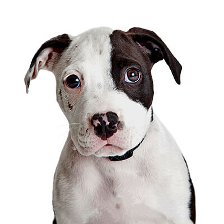

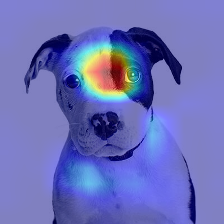

In [53]:
gradcam('block5_conv3',180,dog)

##Grad cam on previous layer

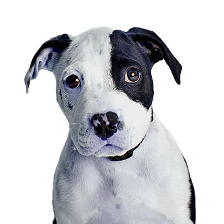

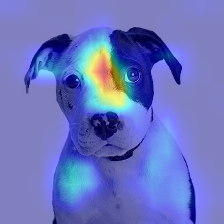

In [48]:
gradcam('block5_conv2',180,dog)

##Detect Sunglasses on Robert

In [0]:

# Uploaded image cause link gave HTTP 403: Forbidden
rdj = io.imread("https://github.com/LokeshJatangi/EVA-vision/blob/master/Project%2010/Assignment%2010/rdj.jpg?raw=true")
rdj = cv2.resize(rdj, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
x = image.img_to_array(rdj)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)


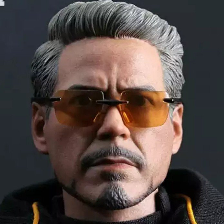

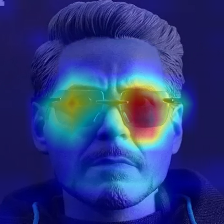

In [69]:
gradcam('block5_conv3',837,rdj)